In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, r2_score

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("data/cleaned_data.csv", index_col=0)
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.002160,-0.002160,0.146,...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.003520,-0.003520,0.586,...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.000581,-0.000581,0.969,...,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,0.000115,-0.000115,1.276,...,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.001130,-0.001130,0.701,...,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,288.75488,48.226200,15.509


In [4]:
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.002160,-0.002160,0.146,...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.003520,-0.003520,0.586,...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.000581,-0.000581,0.969,...,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,0.000115,-0.000115,1.276,...,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.001130,-0.001130,0.701,...,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,288.75488,48.226200,15.509


In [5]:
df.tail()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,ra,dec,koi_kepmag
7311,FALSE POSITIVE,0,1,0,0,23.627035,150.036200,0.01090,-0.01090,1.096,...,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,299.21881,44.181862,16.375
7312,FALSE POSITIVE,0,0,0,1,8.589871,132.016100,0.01570,-0.01570,0.765,...,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,298.74921,46.973351,14.478
7313,FALSE POSITIVE,0,1,1,0,0.527699,131.705093,0.00017,-0.00017,1.252,...,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,297.18875,47.093819,14.082
7314,FALSE POSITIVE,0,0,1,0,0.681402,132.181750,0.00285,-0.00285,0.147,...,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,294.16489,47.176281,15.385
7315,FALSE POSITIVE,0,0,1,1,4.856035,135.993300,0.01080,-0.01080,0.134,...,6469.0,158.0,-225.0,4.385,0.054,-0.216,1.193,297.00977,47.121021,14.826


In [6]:
df.koi_disposition.value_counts()

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
Name: count, dtype: int64

In [7]:
X = df.drop('koi_disposition', axis=1)

In [8]:
Y = df.koi_disposition.astype('category').cat.codes

In [9]:
X.shape

(7316, 27)

In [10]:
Y.shape

(7316,)

In [11]:
x = X.to_numpy()
y = Y.to_numpy()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5852, 27), (5852,), (1464, 27), (1464,))

In [14]:
model = RandomForestClassifier()

In [15]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
preds = model.predict(x_test)
f1_score(preds, y_test)

0.9920948616600791

In [17]:
r2_score(y_test, preds)

0.9492212141904854

<Axes: >

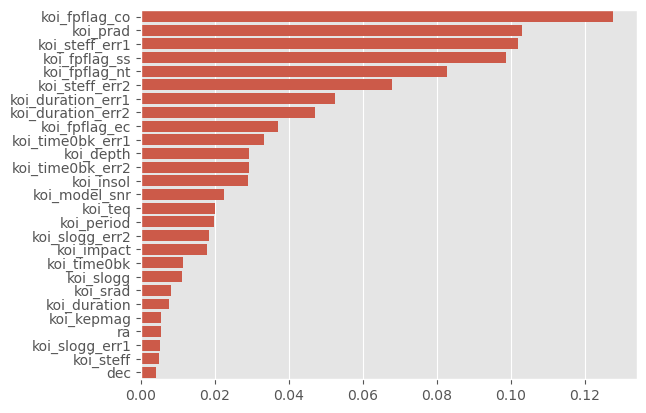

In [18]:
# plot the feature importances

importance = model.feature_importances_
feature_names = X.columns

sorted_importance_index = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_importance_index]
sorted_feature_names = [feature_names[i] for i in sorted_importance_index]

sns.barplot(y=sorted_feature_names, x=sorted_importance)

In [19]:
import joblib

In [21]:
joblib.dump(model, "models/baseline_model.joblib")

['models/baseline_model.joblib']